Importing all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Listing all files in current directory

In [ ]:
print(os.listdir())

['.config', 'sample_data']


To ignore the any warnings

In [ ]:
warnings.filterwarnings('ignore')

Uploading a good dataset i.e., Heart Dataset csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Listing all the files in current directory once again

In [ ]:
print(os.listdir())

['.config', 'heart.csv', 'sample_data']


Assigning variable data to refer to csv file

In [ ]:
data = pd.read_csv("heart.csv")

Print Shape of data(rows,cols), Type(datatype) and first 5 rows of dataset

In [ ]:
print("Shape of data is :", data.shape)
print("Type of data is :", type(data))
print("First 5 rows of data is :\n", data.head())

Shape of data is : (303, 14)
Type of data is : <class 'pandas.core.frame.DataFrame'>
First 5 rows of data is :
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   2       126   458    1        2      154      1      5.4      2   
1   57    0   0       158   384    0        1       76      0      1.0      0   
2   43    0   3       111   286    0        2      201      1      4.9      1   
3   71    1   2       189   515    1        1       71      1      3.6      0   
4   36    0   0       142   303    0        2      128      1      3.5      0   

   ca  thal  target  
0   0     1       1  
1   3     0       1  
2   3     1       0  
3   0     3       1  
4   2     3       0  


Providing statistical calculations of data

In [ ]:
print(data.describe())

              age         sex         cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.00000  303.000000  303.000000  303.000000   
mean    52.267327    0.544554    1.40264  146.511551  352.894389    0.471947   
std     13.896179    0.498835    1.16925   31.336124  127.705381    0.500038   
min     29.000000    0.000000    0.00000   94.000000  126.000000    0.000000   
25%     40.000000    0.000000    0.00000  119.000000  245.500000    0.000000   
50%     53.000000    1.000000    1.00000  148.000000  354.000000    0.000000   
75%     64.000000    1.000000    2.00000  174.000000  456.000000    1.000000   
max     76.000000    1.000000    3.00000  199.000000  563.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.976898  135.491749    0.524752    3.020462    0.973597    1.993399   
std      0.827584   39.067937    0.5

Checking for missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Thus, there are no missing values(all are non-null).

Show the correlation between the columns & sort them in descending order

In [ ]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
ca          0.113737
thalach     0.109876
age         0.100565
exang       0.089382
oldpeak     0.076722
slope       0.074392
cp          0.035066
thal        0.010404
sex         0.010236
chol        0.006371
restecg     0.003902
fbs         0.003491
trestbps    0.000792
Name: target, dtype: float64


Thus, mostly of all columns are moderately correlated but fbs is weakly correlated.

________________________________________________________________________________

**Exploratory Data Analysis**

Calculating frequency of heart disease cases

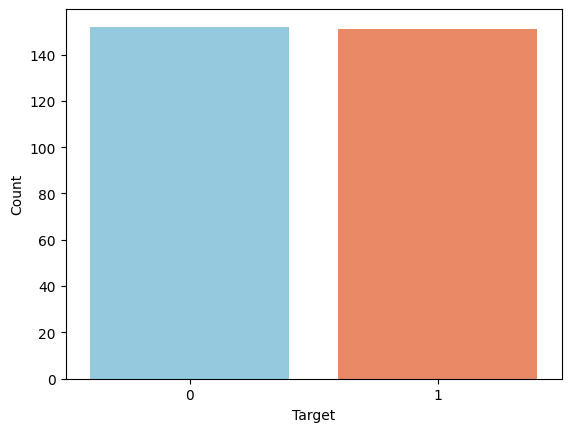

target
0    152
1    151
Name: count, dtype: int64


In [ ]:
target_counts = data['target'].value_counts() # Counts the occurences of each unique value

sns.barplot(x=target_counts.index, y=target_counts.values, palette=['skyblue', 'coral'])

plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

print(target_counts)

Comparing the likelihood of heart disease in male & female. Here 0 is female & 1 is male.

<Axes: xlabel='sex', ylabel='target'>

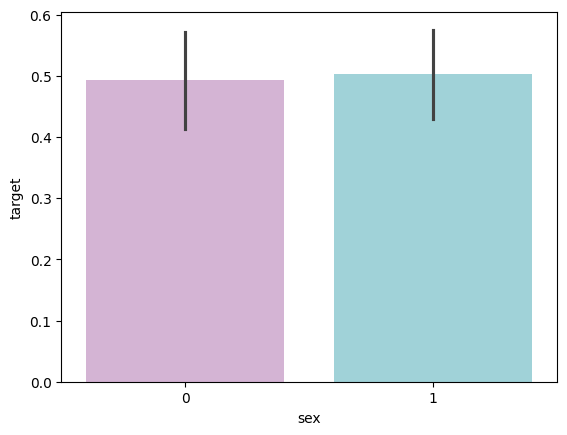

In [ ]:
sns.barplot(x=data["sex"], y=data['target'], palette=['#D9AFD9', '#97D9E1'])

In [ ]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Female Patients % :{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Male Patients % :{:.2f}%".format((countMale)/(len(data.sex))*100))

Female Patients % :45.54%
Male Patients % :54.46%


Calculating the frequency of heart disease for ages(29-77)

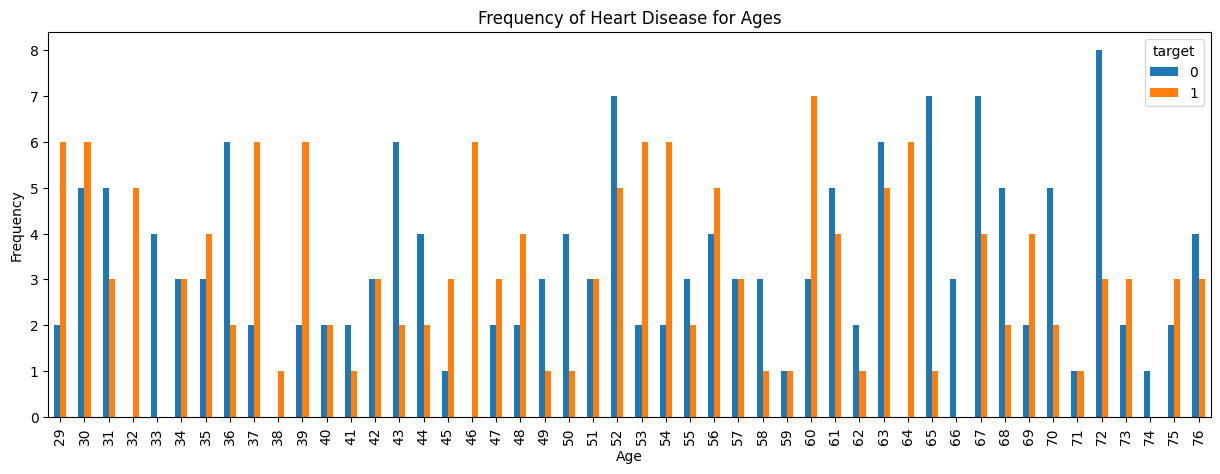

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,5))

plt.title('Frequency of Heart Disease for Ages')

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

Calculating the frequency of Heart Disease for sex

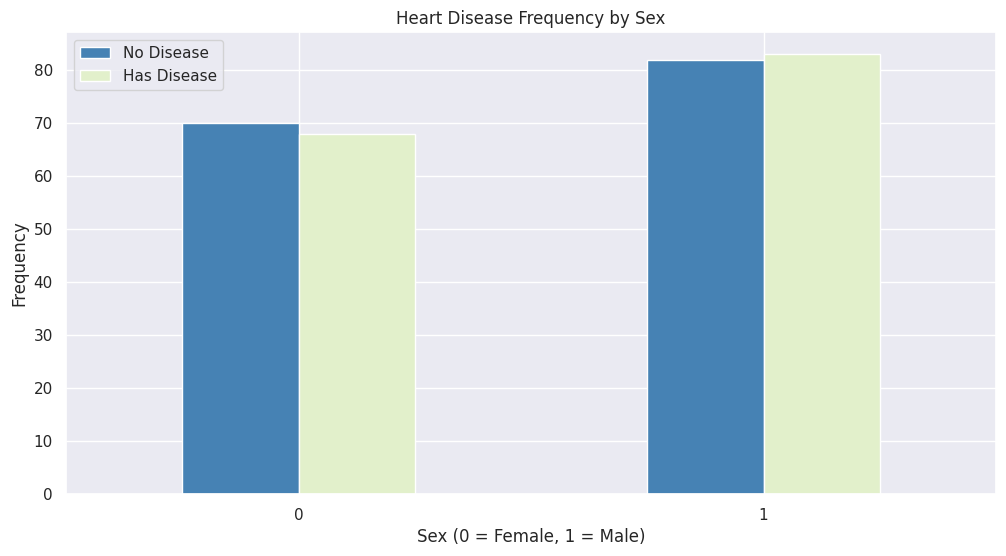

In [ ]:
pd.crosstab(data.sex, data.target).plot(kind="bar", figsize=(12,6), color=['#4682B4', '#E2F0CB'])

plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Has Disease"])

plt.show()

Calculating the frequency of heart disease according to Fasting Blood Sugar

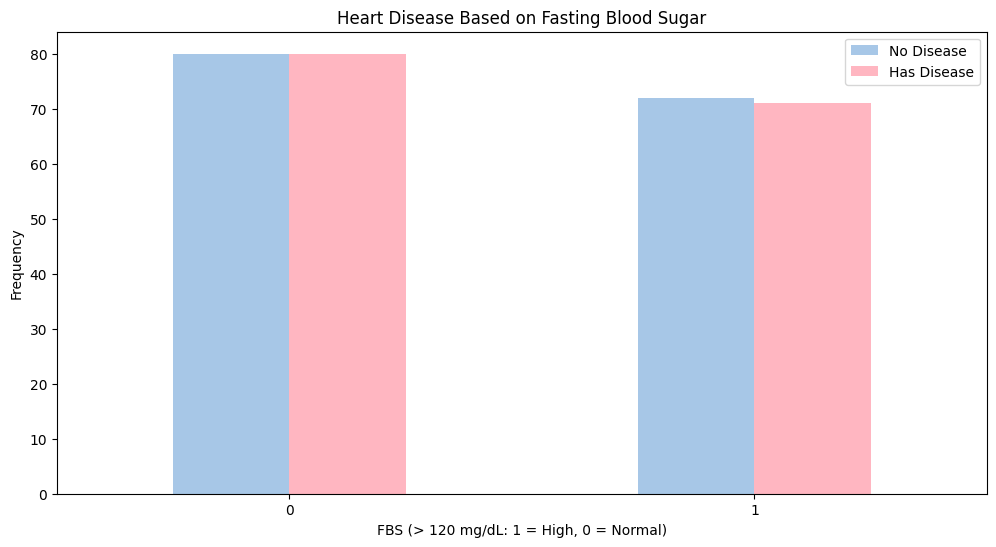

In [ ]:
pd.crosstab(data.fbs, data.target).plot(kind="bar", figsize=(12,6), color=['#A7C7E7', '#FFB6C1'])

plt.title("Heart Disease Based on Fasting Blood Sugar")
plt.xlabel('FBS (> 120 mg/dL: 1 = High, 0 = Normal)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Has Disease"])

plt.show()

Analysing Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

<Axes: xlabel='thal', ylabel='target'>

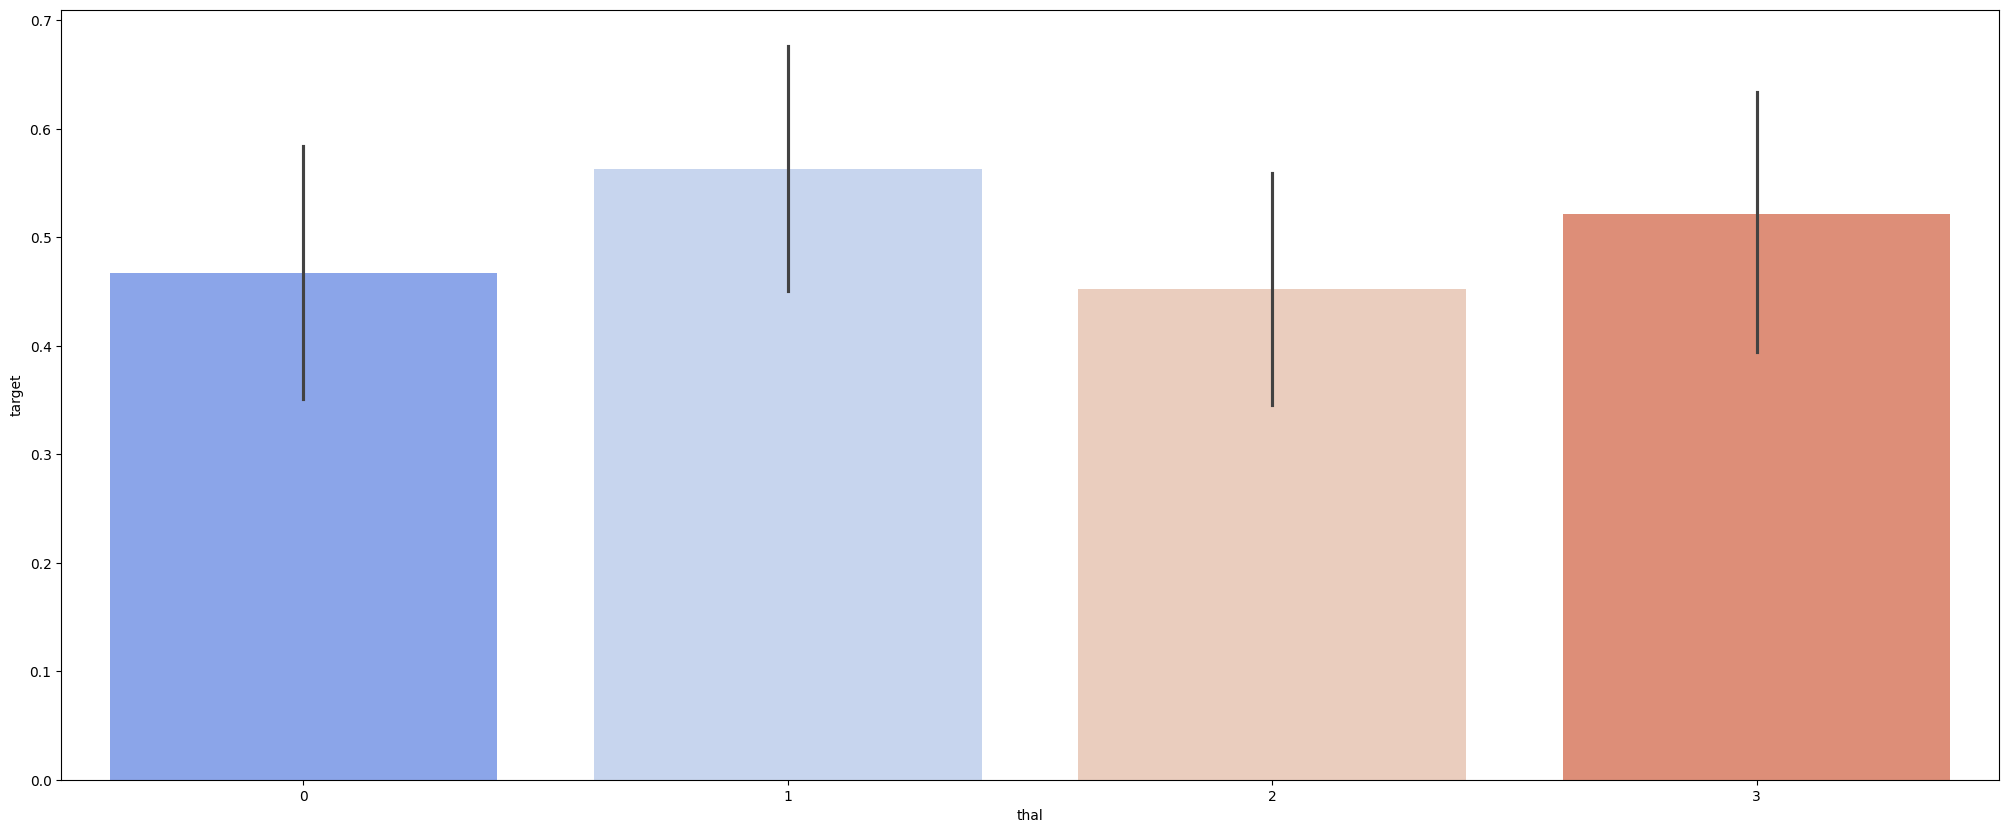

In [ ]:
data["thal"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["thal"], y=data["target"],palette="coolwarm")

Analysing Peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

<Axes: xlabel='slope', ylabel='target'>

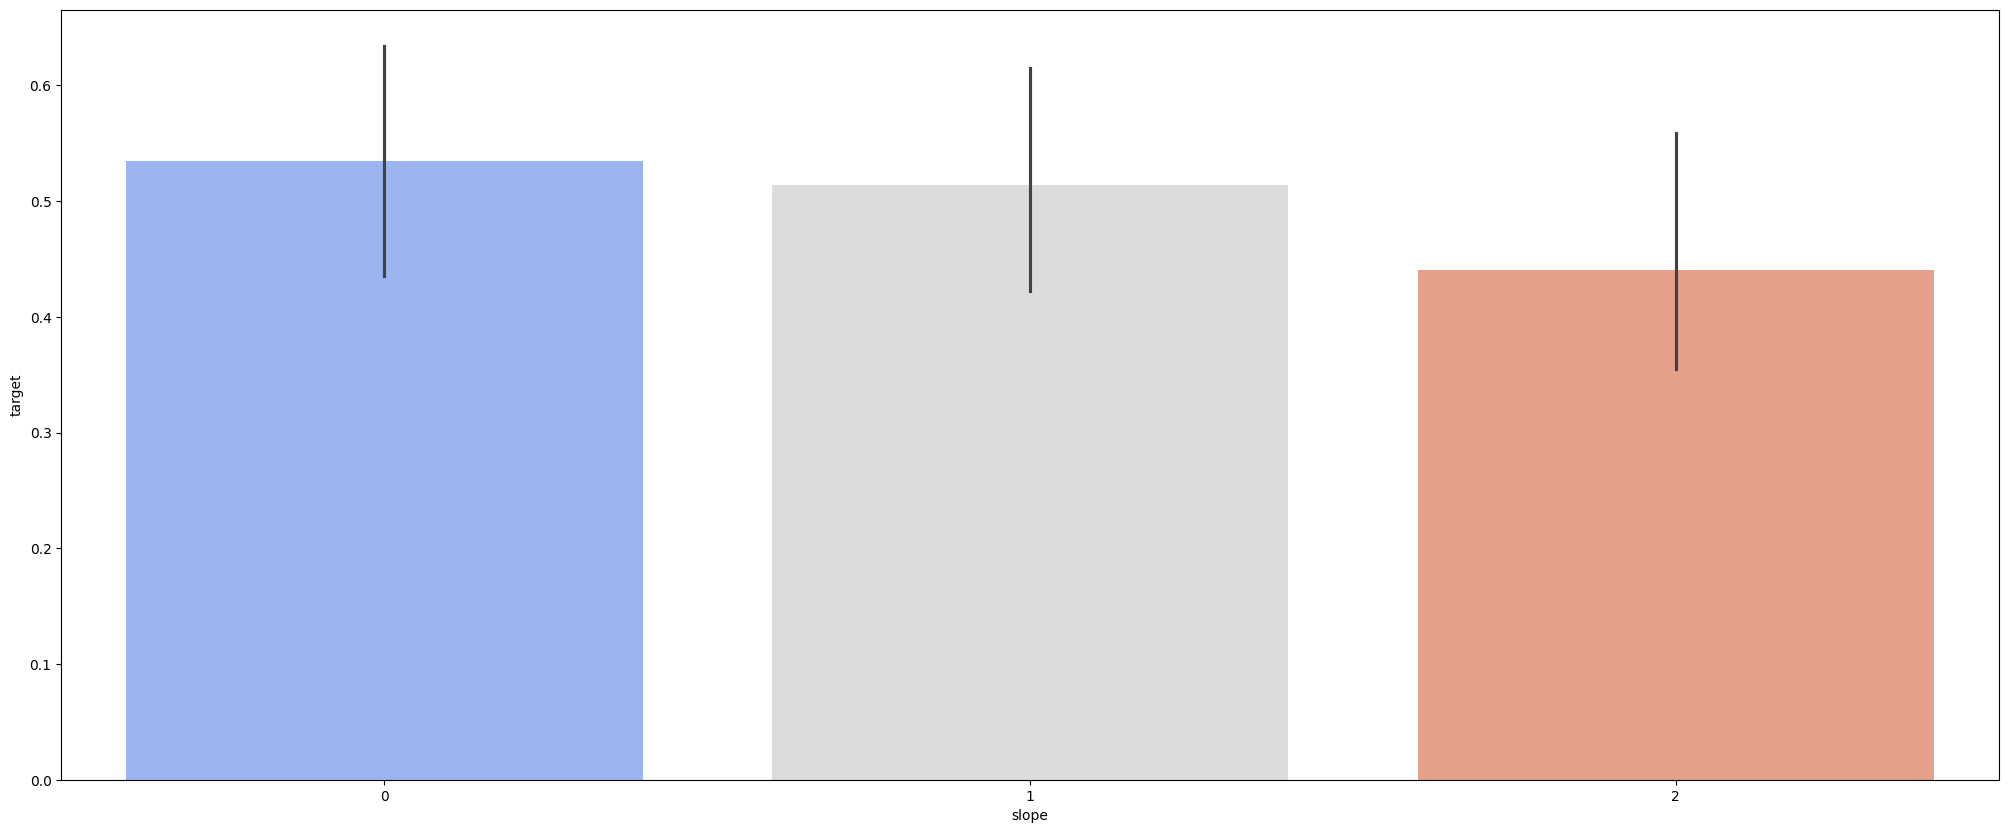

In [ ]:
data["slope"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["slope"], y=data["target"],palette="coolwarm")

Analysing Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

<Axes: xlabel='restecg', ylabel='target'>

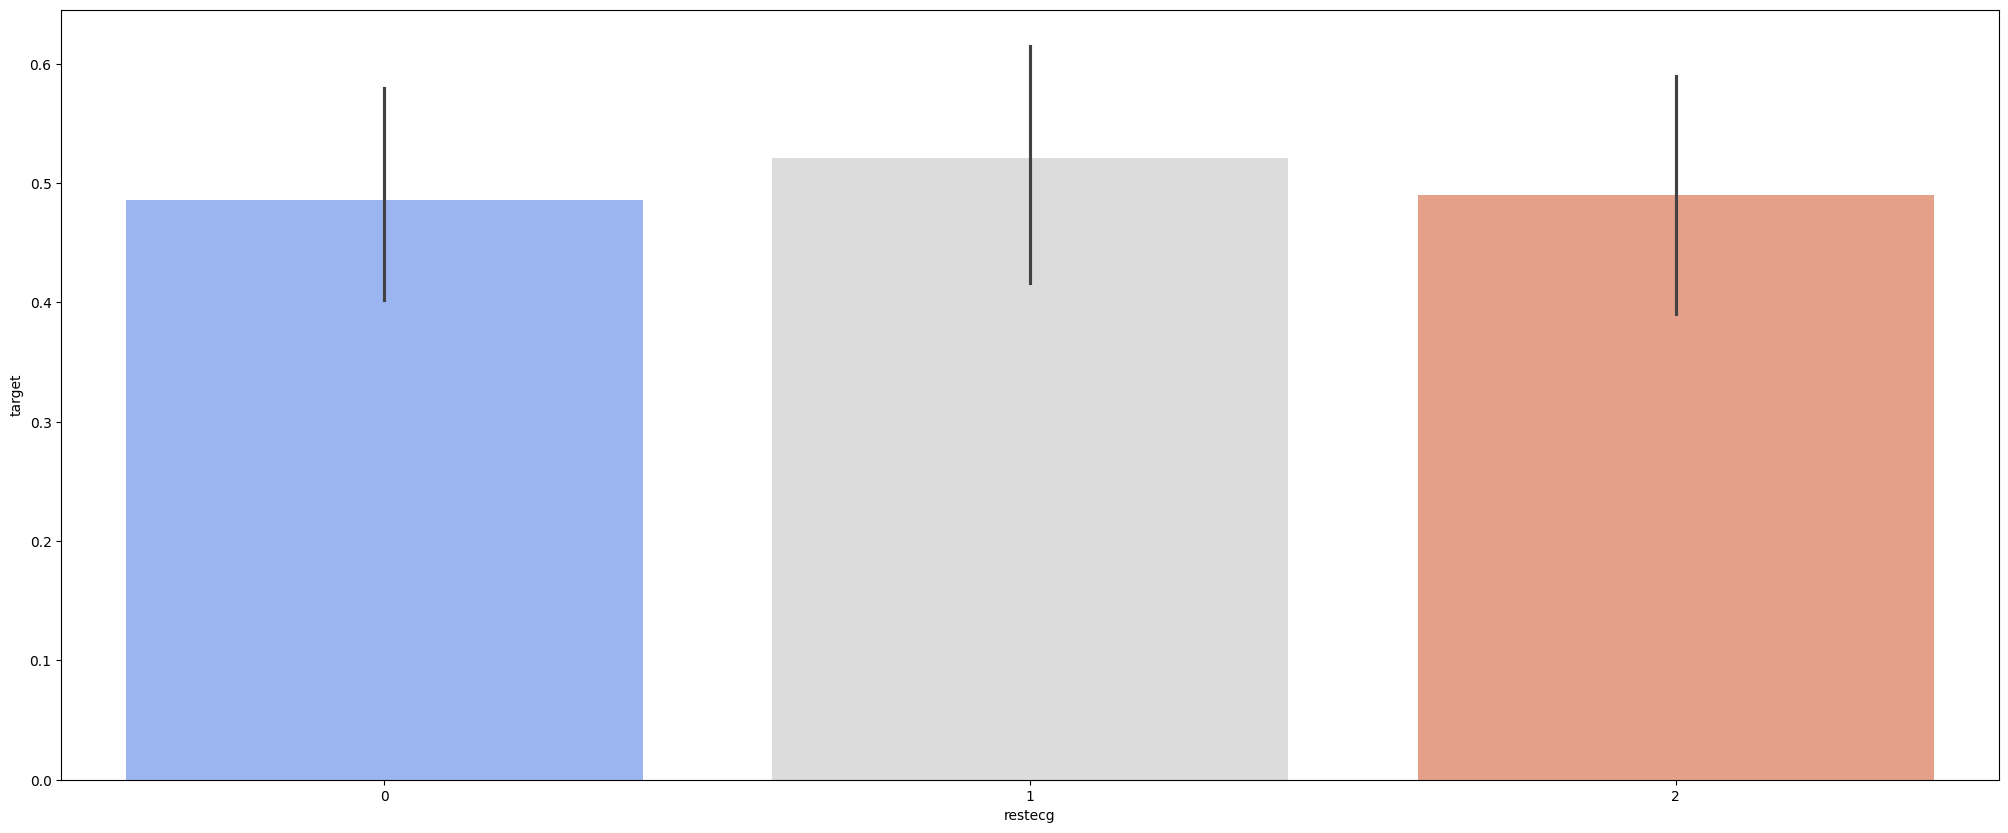

In [ ]:
data["restecg"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["restecg"], y=data["target"],palette="coolwarm")

Analysing Chest pain (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

<Axes: xlabel='cp', ylabel='target'>

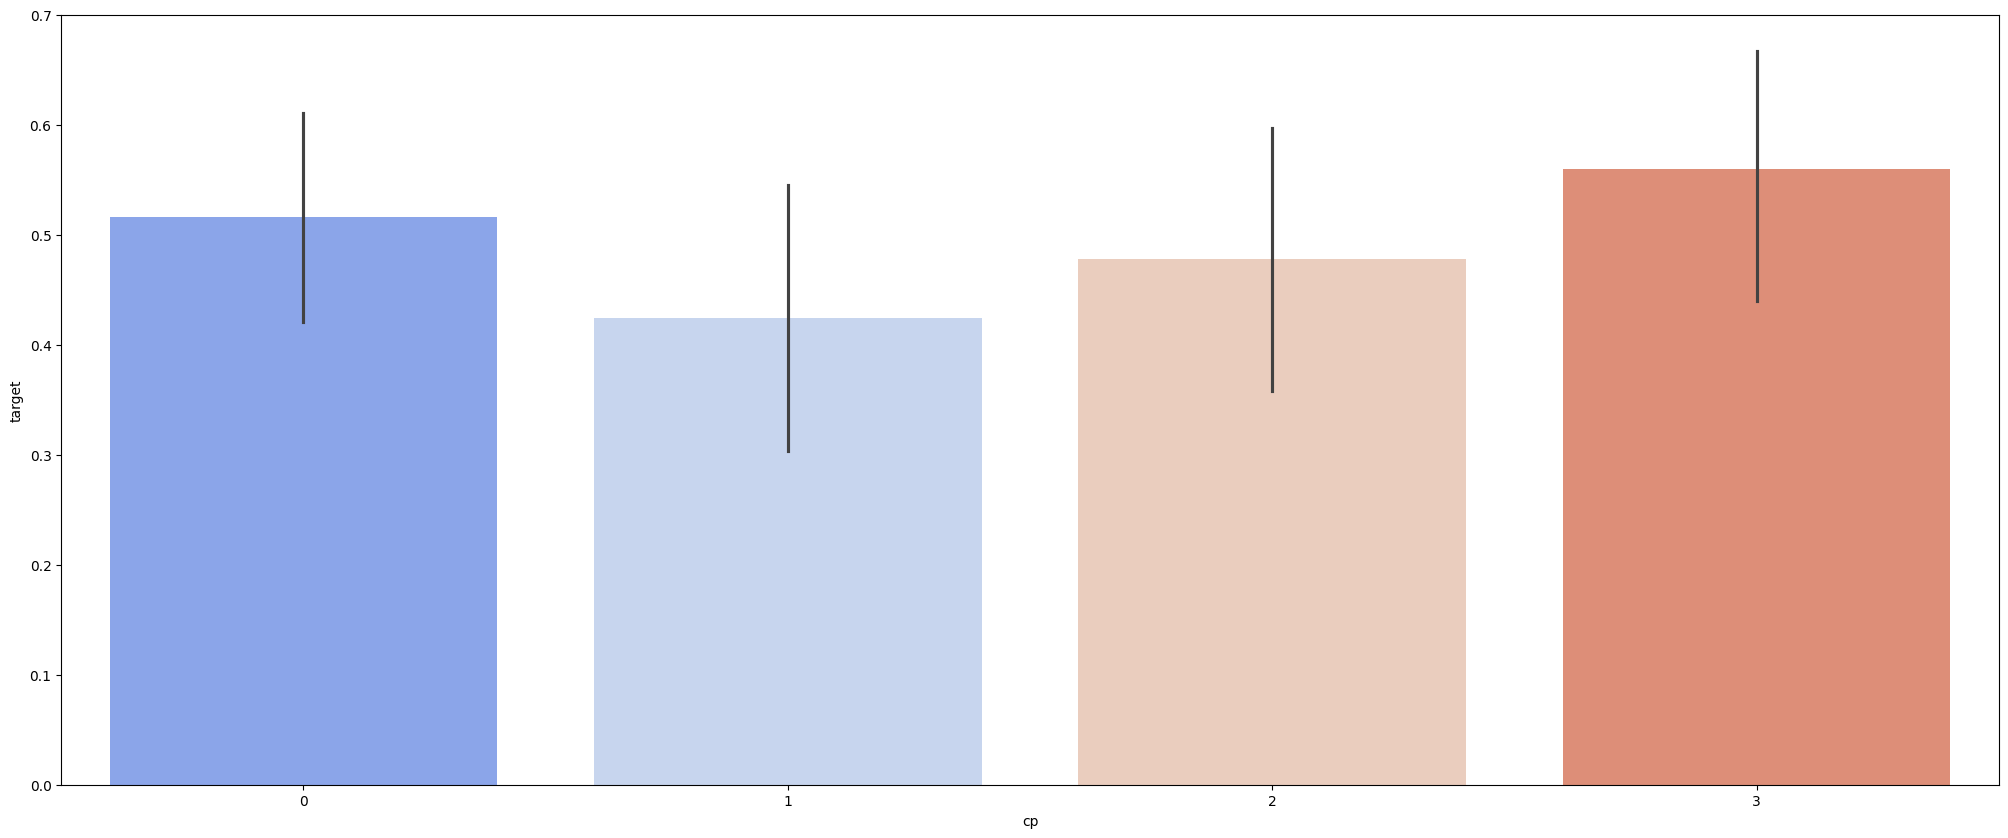

In [ ]:
data["cp"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["cp"], y=data["target"],palette="coolwarm")

Analysing Person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

<Axes: xlabel='fbs', ylabel='target'>

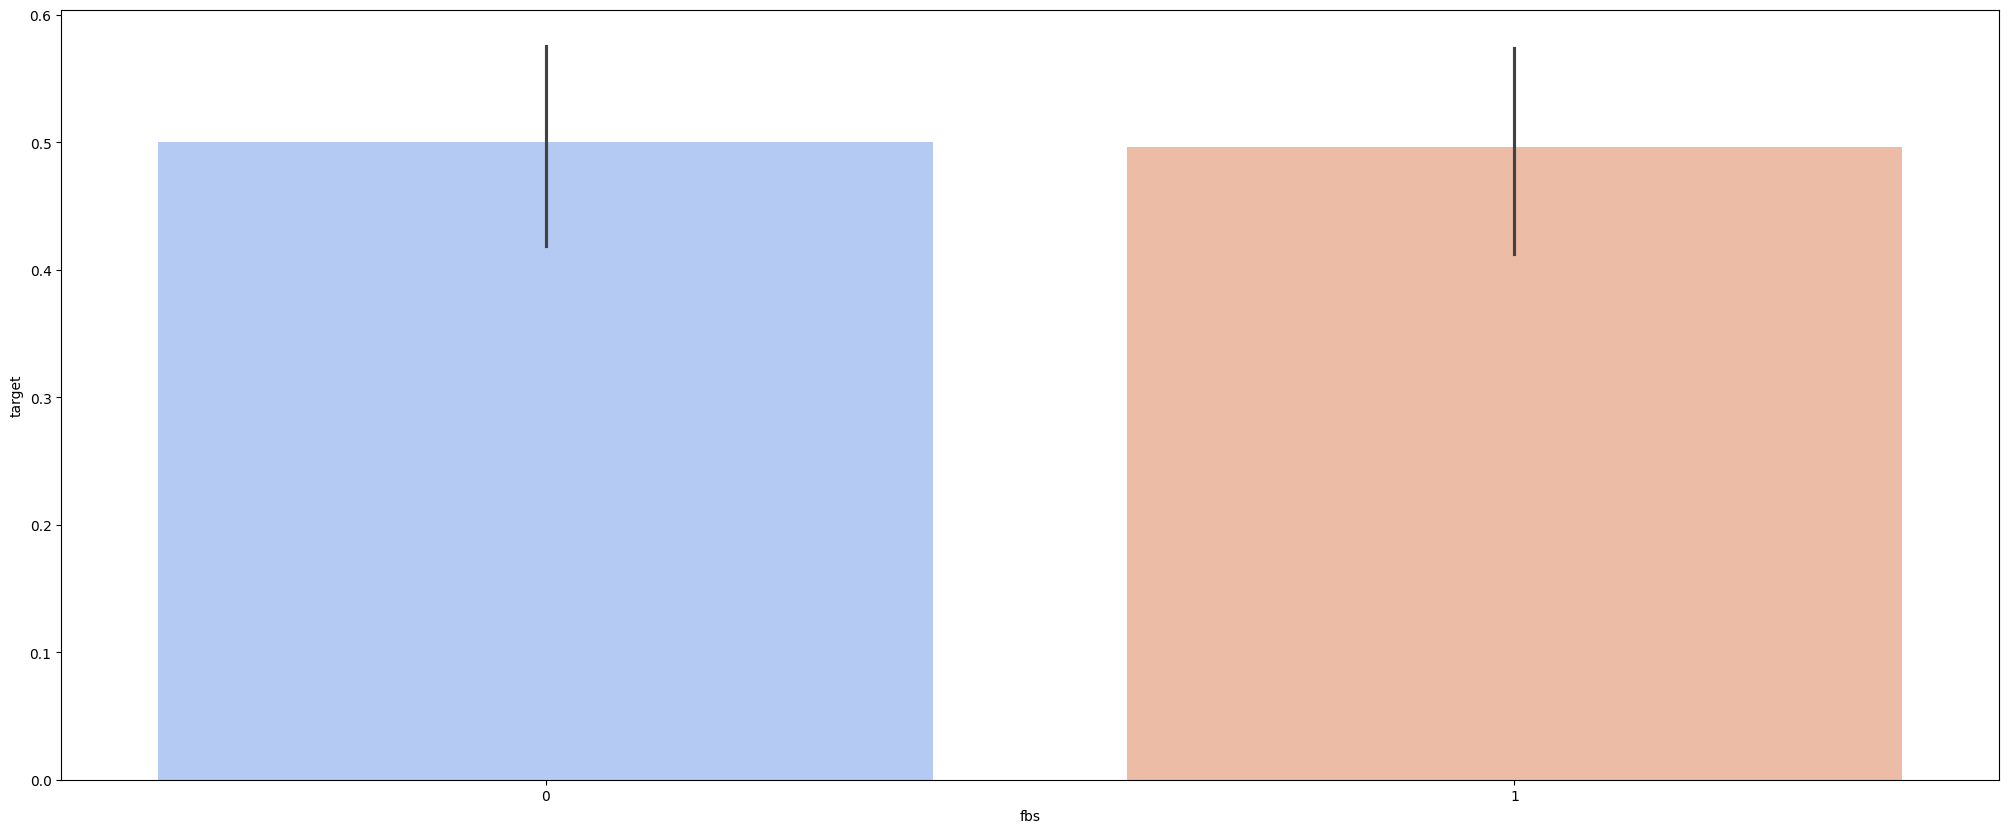

In [ ]:
data["fbs"].unique()
plt.figure(figsize=(25, 10))
sns.barplot(x=data["fbs"], y=data["target"],palette="coolwarm")

For the Correlational Plot

In [ ]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

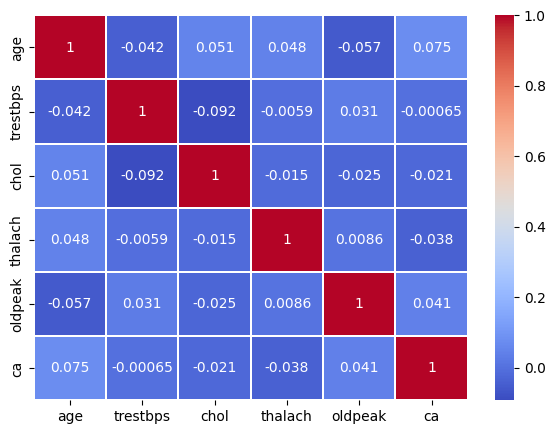

In [ ]:
cnames=['age','trestbps','chol','thalach','oldpeak','ca']
f, ax = plt.subplots(figsize=(7, 5))

df_corr = data.loc[:,cnames]
corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

For the Correlational analysis

In [ ]:
df_corr = data[cnames]  # Shorter way to select columns
df_corr

,age,trestbps,chol,thalach,oldpeak,ca
0,67,126,458,154,5.4,0
1,57,158,384,76,1.0,3
2,43,111,286,201,4.9,3
3,71,189,515,71,3.6,0
4,36,142,303,128,3.5,2
...,...,...,...,...,...,...
298,46,157,287,118,3.1,3
299,74,131,505,107,1.1,0
300,46,130,212,114,4.3,3
301,30,104,180,85,6.1,0


__________________________________________________

**Splitting the dataset for training & testing**

Spltting Dataset for Training and Testing on 5 different models.
Last column i.e. target will be the one checked against all other columns to find algorithm giving best accuracy

In [ ]:
prediction_variable = data.drop("target",axis=1)
target_variable = data["target"]

Data of prediction_variable will be split such that it is 80% for Training, 20% for Testing

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(prediction_variable, target_variable,test_size=0.20,random_state=0)

Shape of each test and train variable

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


**1.** LOGISTIC REGRESSION

In [ ]:
Logistic_Regression = LogisticRegression()

Logistic_Regression.fit(X_train,Y_train)

Y_predicted_LogisticRegression = Logistic_Regression.predict(X_test)

In [ ]:
score_Logistic_Regression = round(accuracy_score(Y_predicted_LogisticRegression,Y_test)*100,2)

print("Accuracy score achieved using Logistic Regression is: "+str(score_Logistic_Regression)+" %")

Accuracy score achieved using Logistic Regression is: 52.46 %


Confusion Matrix

Confusion matrix for the predicted values (Y_pred_lrn) against the actual values (Y_test) of data(heart.csv) dataset.

In [ ]:
matrix= confusion_matrix(Y_test, Y_predicted_LogisticRegression)

Using the Seaborn library to visualize the confusion matrix as a heatmap, which is a graphical representation of the matrix.

<Axes: >

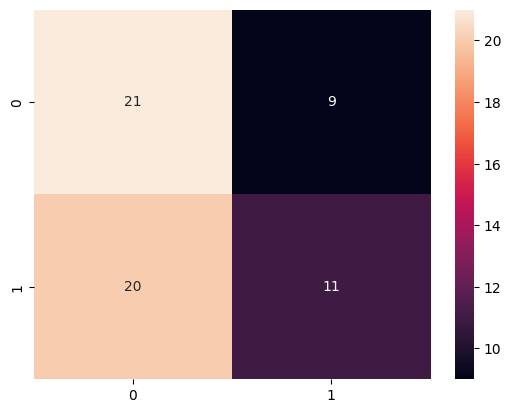

In [ ]:
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [ ]:
precision = precision_score(Y_test, Y_predicted_LogisticRegression)
print("Precision score in LR is: ",precision)

Precision score in LR is:  0.55


Recall

Formula for Recall:

Recall = 𝑇𝑃/ (𝑇𝑃 + FN)

TP (True Positive): The number of instances correctly predicted as positive. FN (False Negative): The number of instances that were actually positive but were predicted as negative.

In [ ]:
recall = recall_score(Y_test, Y_predicted_LogisticRegression)
print("Recall in LR is: ",recall)

Recall in LR is:  0.3548387096774194


F-Score

F Score also referred to as F1 score is a metric used to measure a model's accuracy, specifically when the dataset is imbalanced. It considers both precision and recall and gives a balanced score.

In [ ]:
print((2*precision*recall)/(precision+recall))

0.43137254901960786


Bad cm style

Using Pandas to create a confusion matrix (CM) from the actual (Y_test) and predicted (Y_pred_knn) labels by constructing a cross-tabulation (or contingency table) between them.

In [ ]:
CM = pd.crosstab(Y_test, Y_predicted_LogisticRegression)
CM

col_0,0,1
target,,
0,21,9
1,20,11


Extracting the values from the confusion matrix (CM) into variables representing the True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP).

In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

The False Negative Rate (FNR) is a performance metric used to measure the proportion of actual positives that are incorrectly predicted as negative (false negatives).

In [ ]:
fnr = FN*100/(FN+TP)
fnr

np.float64(64.51612903225806)

**2.** NAIVE BAYES

In [ ]:
Naive_Bayes = GaussianNB()

Naive_Bayes.fit(X_train, Y_train)

Y_predicted_NaiveBayes = Naive_Bayes.predict(X_test)

In [ ]:
score_NaiveBayes = round(accuracy_score(Y_predicted_NaiveBayes,Y_test)*100,2)

print("Accuracy score achieved using Naive Bayes is: "+str(score_NaiveBayes)+" %")

Accuracy score achieved using Naive Bayes is: 47.54 %


Confusion Matrix

<Axes: >

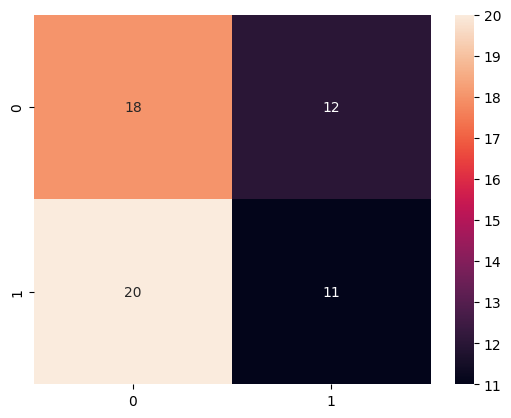

In [ ]:
matrix= confusion_matrix(Y_test, Y_predicted_NaiveBayes)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [ ]:
precision = precision_score(Y_test, Y_predicted_NaiveBayes)
print("Precision score in NB is: ",precision)

Precision score in NB is:  0.4782608695652174


Recall

In [ ]:
recall = recall_score(Y_test, Y_predicted_NaiveBayes)
print("Recall in NB is: ",recall)

Recall in NB is:  0.3548387096774194


F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.40740740740740744


Bad cm style

In [ ]:
CM = pd.crosstab(Y_test, Y_predicted_NaiveBayes)
CM

col_0,0,1
target,,
0,18,12
1,20,11


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [ ]:
fnr = FN*100/(FN+TP)
fnr

np.float64(64.51612903225806)

**3.** K NEAREST NEIGHBORS

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)
Y_predicted_KNN = KNN.predict(X_test)

In [ ]:
score_Knn = round(accuracy_score(Y_predicted_KNN,Y_test)*100,2)

print("Accuracy score achieved using KNN is: "+str(score_Knn)+" %")

Accuracy score achieved using KNN is: 49.18 %


Confusion Matrix

<Axes: >

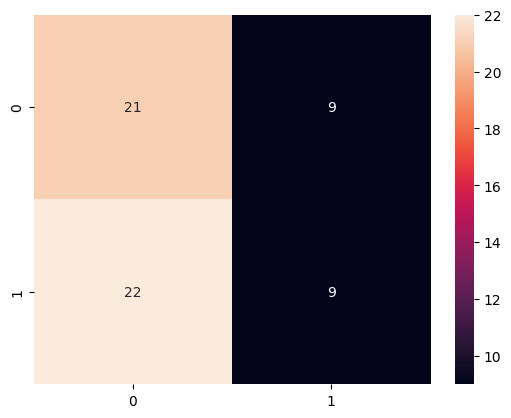

In [ ]:
matrix= confusion_matrix(Y_test, Y_predicted_KNN)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [ ]:
precision = precision_score(Y_test, Y_predicted_KNN)
print("Precision score in KNN is: ",precision)

Precision score in KNN is:  0.5


Recall

In [ ]:
recall = recall_score(Y_test, Y_predicted_KNN)
print("Recall in KNN is: ",recall)

Recall in KNN is:  0.2903225806451613


F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.3673469387755102


Bad cm style

In [ ]:
CM = pd.crosstab(Y_test, Y_predicted_KNN)
CM

col_0,0,1
target,,
0,21,9
1,22,9


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [ ]:
fnr = FN*100/(FN+TP)
fnr

np.float64(70.96774193548387)

**4.** DECISION TREE

In [ ]:
max_accuracy = 0

for x in range(200):
    Decision_Tree = DecisionTreeClassifier(random_state = x)
    Decision_Tree.fit(X_train,Y_train)
    Y_predicted_DecisionTree = Decision_Tree.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_predicted_DecisionTree, Y_test)*100 : .2f}")
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


Decision_Tree = DecisionTreeClassifier(random_state = best_x)
Decision_Tree.fit(X_train,Y_train)
Y_predicted_DecisionTree = Decision_Tree.predict(X_test)

52.46
44


In [ ]:
score_DecisionTree = round(accuracy_score(Y_predicted_DecisionTree,Y_test)*100,2)

print("Accuracy score achieved using Decision Tree is: "+str(score_DecisionTree)+" %")

Accuracy score achieved using Decision Tree is: 52.46 %


Confusion Matrix

<Axes: >

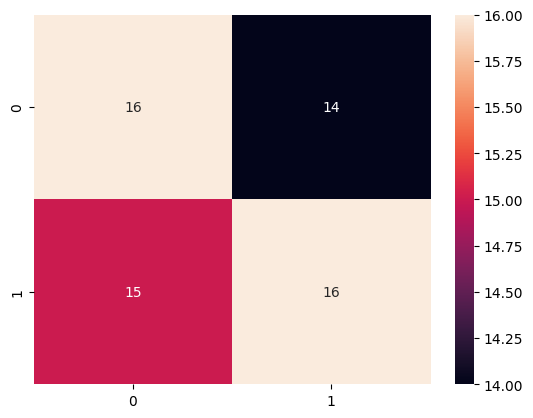

In [ ]:
matrix= confusion_matrix(Y_test, Y_predicted_DecisionTree)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [ ]:
precision = precision_score(Y_test, Y_predicted_DecisionTree)
print("Precision score in DT is: ",precision)

Precision score in DT is:  0.5333333333333333


Recall

In [ ]:
recall = recall_score(Y_test, Y_predicted_DecisionTree)
print("Recall in DT is: ",recall)

Recall in DT is:  0.5161290322580645


F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.5245901639344263


Bad cm style

In [ ]:
CM = pd.crosstab(Y_test, Y_predicted_DecisionTree)
CM

col_0,0,1
target,,
0,16,14
1,15,16


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [ ]:
fnr = FN*100/(FN+TP)
fnr

np.float64(48.38709677419355)

**5.** RANDOM FOREST

In [ ]:
max_accuracy = 0

for x in range(2000):
    Random_Forest = RandomForestClassifier(random_state=x)
    Random_Forest.fit(X_train,Y_train)
    Y_predicted_RandomForest = Random_Forest.predict(X_test)
    current_accuracy = float(f"{accuracy_score(Y_predicted_RandomForest, Y_test)*100 : .2f}")
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

Random_Forest = RandomForestClassifier(random_state=best_x)
Random_Forest.fit(X_train,Y_train)
Y_predicted_RandomForest = Random_Forest.predict(X_test)

60.66
205


In [ ]:
score_RandomForest = round(accuracy_score(Y_predicted_RandomForest,Y_test)*100,2)

print("Accuracy score achieved using Random Forest is: "+str(score_RandomForest)+" %")

Accuracy score achieved using Random Forest is: 60.66 %


Confusion Matrix

<Axes: >

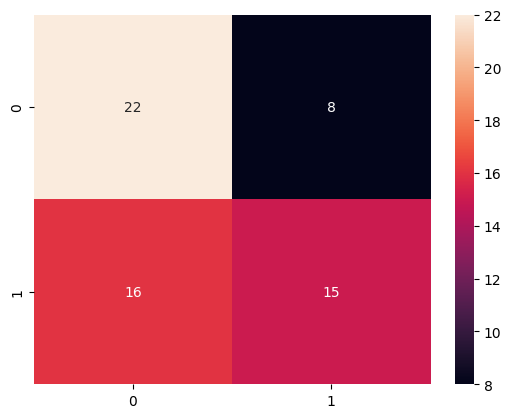

In [ ]:
matrix= confusion_matrix(Y_test, Y_predicted_RandomForest)
sns.heatmap(matrix,annot = True, fmt = "d")

Precision Score

In [ ]:
precision = precision_score(Y_test, Y_predicted_RandomForest)
print("Precision score in RF is: ",precision)

Precision score in RF is:  0.6521739130434783


Recall

In [ ]:
recall = recall_score(Y_test, Y_predicted_RandomForest)
print("Recall in RF is: ",recall)

Recall in RF is:  0.4838709677419355


F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.5555555555555556


Bad cm style

In [ ]:
CM =pd.crosstab(Y_test, Y_predicted_RandomForest)
CM

col_0,0,1
target,,
0,22,8
1,16,15


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False Negative Rate

In [ ]:
fnr=FN*100/(FN+TP)
fnr

np.float64(51.61290322580645)

__________________________________________________

**Final Result**

In [ ]:
scores = [score_Logistic_Regression,score_NaiveBayes,score_Knn,score_DecisionTree,score_RandomForest]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("Accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

Accuracy score achieved using Logistic Regression is: 52.46 %
Accuracy score achieved using Naive Bayes is: 47.54 %
Accuracy score achieved using K-Nearest Neighbors is: 49.18 %
Accuracy score achieved using Decision Tree is: 52.46 %
Accuracy score achieved using Random Forest is: 60.66 %


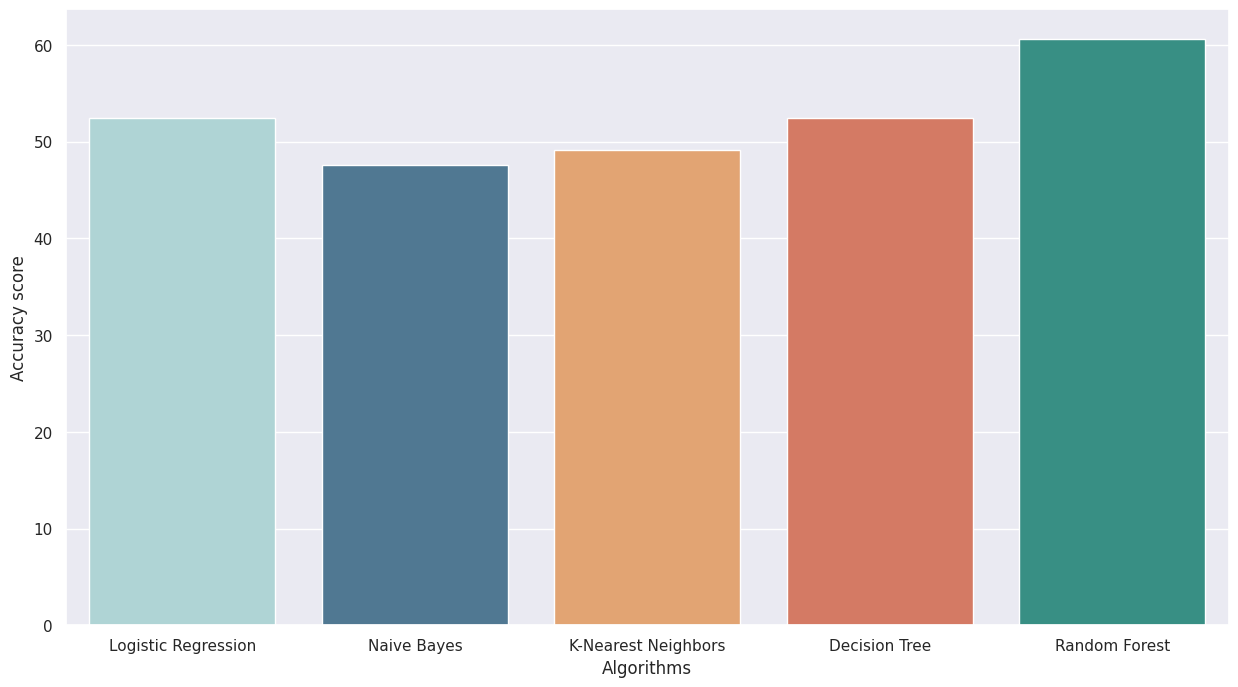

In [ ]:
colours = ["#A8DADC", "#457B9D", "#F4A261", "#E76F51", "#2A9D8F"]

sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x=algorithms, y=scores, palette=colours)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

plt.show()